In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import os

In [20]:
def get_dataframe(filename, path='results'):
    with open(os.path.join(path,filename)) as file:
        data = file.read()
    filename_info = filename.split('.')[0].split('_')
    df = pd.read_json(data[:-1].replace("'", '"').replace('True', '"True"').replace('False', '"False"'), lines=True)
    df = df.replace({'solved': {'True': True, 'False': False}}).astype({'time':np.float32, 'solved':'bool'})
    df['problem']=filename_info[-2]
    df = df.loc[df['solver']!='nrpa-1-100-heur-old']
    return df

def get_dataframes(path='results'):
    filenames = os.listdir(path)
    df = pd.concat([get_dataframe(filename, path) for filename in filenames], axis=0)
    return df

In [21]:
df = get_dataframes(path='results')
df.head()

,filename,time,solver,solved,problem
0,nqueens_128,16.007700,nmcs-1,True,nqueens
1,nqueens_192,20.069571,nmcs-1,True,nqueens
2,nqueens_32,0.587450,nmcs-1,True,nqueens
3,nqueens_64,0.213520,nmcs-1,True,nqueens
4,nqueens_256,12.998340,nmcs-1,True,nqueens


In [22]:
df['solver'].value_counts()

backtracking       90
nrpa-1-100-heur    90
nmcs-1             90
nmcs-2              8
Name: solver, dtype: int64

In [23]:
df['problem'].value_counts()

coloring              108
sudoku                 90
nqueens                32
nqueens-sym-simple     24
nqueens-sym            24
Name: problem, dtype: int64

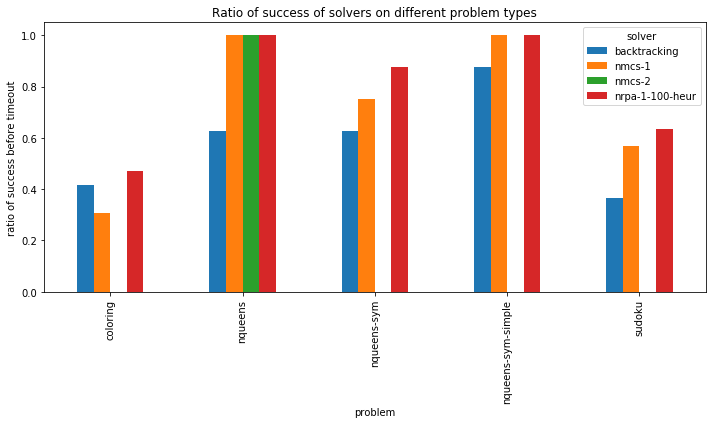

In [24]:
fig, ax = plt.subplots(1, figsize = (10,6))

df.groupby(['problem', 'solver'])['solved'].mean().unstack().plot.bar(ax=ax)
ax.set_ylabel('ratio of success before timeout')
ax.set_title('Ratio of success of solvers on different problem types')

plt.tight_layout()
plt.savefig('images/results_success.png')
plt.show()

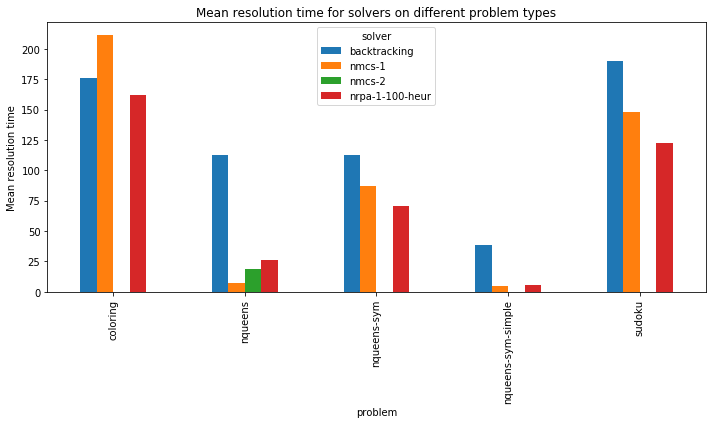

In [26]:
fig, ax = plt.subplots(1, figsize = (10,6))

df.groupby(['problem', 'solver'])['time'].mean().unstack().plot.bar(ax=ax)
ax.set_ylabel('Mean resolution time')
ax.set_title('Mean resolution time for solvers on different problem types')

plt.tight_layout()
plt.savefig('images/results_meantime.png')
plt.show()

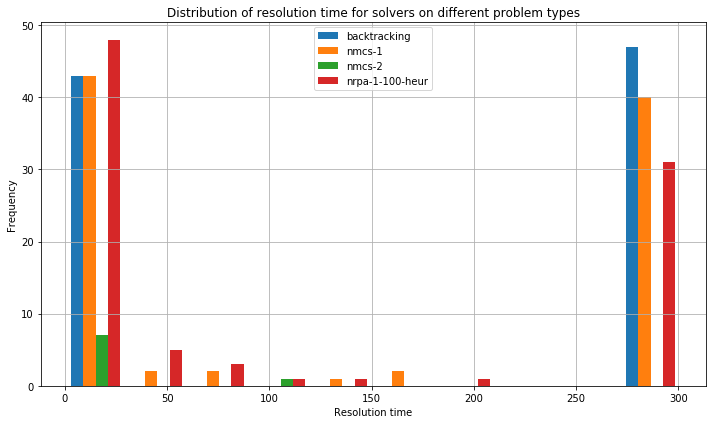

In [33]:
fig, ax = plt.subplots(1, figsize = (10,6))

times_dist = df.groupby('solver')['time'].apply(list)
times_dist.hist(bins = 10, ax=ax)

ax.legend(times_dist.index)
ax.set_ylabel('Frequency')
ax.set_xlabel('Resolution time')
ax.set_title('Distribution of resolution time for solvers on different problem types')

plt.tight_layout()
plt.savefig('images/results_distributiontime.png')
plt.show()